In [1]:
pip install pandas numpy matplotlib nltk tqdm seaborn


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv("/Users/pulkitbatra/Desktop/CACSC17/Project/ThreadsSentimentAnalysis/37000_reviews_of_thread_app.csv",usecols=['source','review_id','user_name','review_description','rating','review_date','laguage_code','country_code','thumbs_up'])

In [4]:
df.reset_index(inplace = True)

In [5]:
df.head()

,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [6]:
df.shape

(36943, 10)

In [7]:
df['rating'].value_counts()

rating
5    17000
1    11282
4     3588
3     2956
2     2117
Name: count, dtype: int64

In [8]:
df['thumbs_up'].value_counts()

thumbs_up
0.0      30611
1.0       2889
2.0        520
3.0        193
4.0        124
         ...  
164.0        1
91.0         1
547.0        1
268.0        1
114.0        1
Name: count, Length: 149, dtype: int64

In [9]:
df['thumbs_up'].max()

5557.0

<Axes: title={'center': 'count for rating'}, xlabel='rating'>

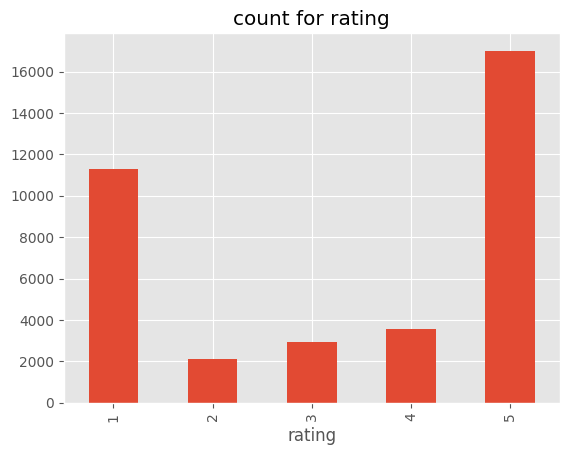

In [10]:
df['rating'].value_counts().sort_index().plot(kind='bar',title='count for rating')

## Doing some random analysis

In [11]:
temp=df['review_description'][55]
temp

'Super intuitive and easily portable from Instagram etc. I enjoy it I just always forget to use the damn thing after the influx when it debuted!'

In [12]:
# nltk.download('punkt')
# from nltk.tokenize import sent_tokenize, word_tokenize
# token = nltk.word_tokenize(temp)


In [13]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

In [14]:
token = nltk.word_tokenize(temp)
token

['Super',
 'intuitive',
 'and',
 'easily',
 'portable',
 'from',
 'Instagram',
 'etc',
 '.',
 'I',
 'enjoy',
 'it',
 'I',
 'just',
 'always',
 'forget',
 'to',
 'use',
 'the',
 'damn',
 'thing',
 'after',
 'the',
 'influx',
 'when',
 'it',
 'debuted',
 '!']

In [18]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pulkitbatra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/pulkitbatra/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/pulkitbatra/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pulkitbatra/nltk_data...


True

In [16]:
tag = nltk.pos_tag(token)
chunk = nltk.chunk.ne_chunk(tag)

#  VADER Sentiment Scoring

In [19]:
sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores(temp)

{'neg': 0.138, 'neu': 0.569, 'pos': 0.293, 'compound': 0.7345}

In [24]:
result = {}
for i , rows in tqdm(df.iterrows(),total = len(df)):
    text = rows['review_description']
    id_ = rows['index']
    result[id_] = sia.polarity_scores(text)

100%|██████████| 36943/36943 [00:04<00:00, 7657.82it/s]


In [25]:
result

{0: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 1: {'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404},
 2: {'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.9201},
 3: {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369},
 4: {'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.3384},
 5: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 6: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215},
 7: {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.3252},
 8: {'neg': 0.349, 'neu': 0.549, 'pos': 0.102, 'compound': -0.4854},
 9: {'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.7506},
 10: {'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369},
 11: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.6369},
 14: {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404},
 15: {'neg': 0.0, 'neu': 1.

In [26]:
final = pd.DataFrame(result).T
final.head().reset_index()

,index,neg,neu,pos,compound
0,0,0.000,0.000,1.000,0.4404
1,1,0.492,0.508,0.000,-0.4404
2,2,0.000,0.532,0.468,0.9201
3,3,0.000,0.192,0.808,0.6369
4,4,0.000,0.295,0.705,0.3384


In [27]:
final = pd.concat([final,df],axis = 1)

In [28]:
final.head()

,neg,neu,pos,compound,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
0,0.000,0.000,1.000,0.4404,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,Good,5,0.0,2023-08-07 19:14:36,en,us
1,0.492,0.508,0.000,-0.4404,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,en,us
2,0.000,0.532,0.468,0.9201,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,en,us
3,0.000,0.192,0.808,0.6369,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,Love it,5,0.0,2023-08-07 18:37:16,en,us
4,0.000,0.295,0.705,0.3384,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,Very god,5,0.0,2023-08-07 18:14:15,en,us


In [29]:
final.sample(10)

,neg,neu,pos,compound,index,source,review_id,user_name,review_description,rating,thumbs_up,review_date,laguage_code,country_code
5537,0.000,1.000,0.000,0.0000,5537,Google Play,1020b5ee-4a66-4eda-86de-da490c034324,XPERD NOOB,Copy of twitter,1,0.0,2023-07-15 18:03:10,en,us
33296,0.000,0.442,0.558,0.8442,33296,Google Play,31062739-7fad-4cd0-bbbe-6459a2085462,Izag Urdum (MrUrdum),supper cool I wish I could pin my post and fav...,4,0.0,2023-07-06 10:23:32,en,us
9757,0.000,0.328,0.672,0.6249,9757,Google Play,dad06d7e-8435-48a3-9016-d9d2c838ca7c,Patrick promise,Great for now,4,0.0,2023-07-10 21:35:14,en,us
10847,0.000,1.000,0.000,0.0000,10847,Google Play,5775025d-a606-4b98-9fc1-33e55c5fe6fd,Furkhan Ullah,Try to add download feature,1,0.0,2023-07-10 05:06:49,en,us
25927,0.000,0.110,0.890,0.8442,25927,Google Play,6269f99e-f57d-4cbc-8537-2ef1ae383e24,Ursjtr Skyryory,Super I love it,5,0.0,2023-07-06 23:50:54,en,us
11221,0.153,0.847,0.000,-0.3687,11221,Google Play,51cac957-1b9a-47d6-bb08-94c230cc0f2d,sd hasan,"same as teitter , so not interested in more so...",1,0.0,2023-07-09 23:41:59,en,us
35897,0.301,0.546,0.153,-0.4728,35897,App Store,2cfcbf9d-d901-4e6b-9090-52eeadeda6cd,Scrill X,Y’all in these reviews just hating this the be...,5,NaN,2023-07-07 20:55:26,en,us
18825,0.000,0.000,1.000,0.4215,18825,Google Play,50c4bc82-0686-4401-a125-9bbdcdc53c21,Ummer Farooq,Nice,5,0.0,2023-07-07 20:38:45,en,us
432,0.649,0.351,0.000,-0.5719,432,Google Play,79aba9b2-53e5-4c63-a5ec-a3bc40dcd424,a khan,It is a scam,1,0.0,2023-08-04 12:59:22,en,us
23159,0.000,0.430,0.570,0.8910,23159,Google Play,d61c6d5c-2bba-4f09-87fd-e0459c6d11ba,Tamil Selvi,Wow super good morning sir you are you doing n...,5,0.0,2023-07-07 08:56:01,en,us


In [30]:
print("Done for now")

Done for now


# Completed on 17 August